# Semi Direct Effects: Plotting LTS Relationships

## Libs

In [1]:
%matplotlib inline

import os, sys
import pylab as plt
import numpy as np
import datetime
import scipy.ndimage

import seaborn as sns
sns.set_context('talk')

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H')

import pandas as pd
import xarray as xr
xr.set_options(keep_attrs=True)


## Open LST Data

In [2]:
icon_path = '/pf/b/b380352/data/icon-lem'
filename = f'{icon_path}/aggregates/averages_conditioned_on_LTS.nc'


In [3]:
d = xr.open_dataset( filename )

## Plotting

In [24]:
def plot_var( vname, ylabel1 = '', ylabel2 = '', title = '', scale = 1, ax = None, plot_legend = False,
              plot_both_absolute_curves = False, xlab = 'Lower Tropospheric Stability / K'):
    
    
    v = scale * d[vname].mean( 'time' )
    
    # mean = v.mean( ['mode', 'dom'] )
    mean = v.sel( mode = 'scattering' ).mean( 'dom' )
    
    diff = v.sel( mode = 'absorbing') - v.sel( mode = 'scattering' )
    
    
    if ax is None:
        fig, ax = plt.subplots( figsize = (6,3))
    ax2 = ax.twinx( )
    
    
    if plot_both_absolute_curves:
        mean = v.mean('dom')
        mean.sel(mode = 'scattering').plot( x = 'cond', color = 'k', lw = 3, ax = ax2 )
        mean.sel(mode = 'absorbing').plot( x = 'cond', color = 'k', lw = 1, ax = ax2 )

    else:
        mean.plot( x = 'cond', color = 'k', lw = 3, ax = ax2 )
    
    kws = dict(x = 'cond', lw = 3, ms = 18, mec = 'w', mew = 2, ax = ax )
    diff.sel( dom = 'DOM01').plot( marker = '^', label = '625m', **kws)
    diff.sel( dom = 'DOM02').plot( marker = 'v', label = '312m', **kws)
    
    
    
    sns.despine( right=False,)
    
    
    # xlab = 'LTS / K'
    ax.set_xlabel( xlab )
    ax.set_ylabel( ylabel1, )
    ax.set_title( title, fontweight = 'bold', pad = 20)
    
    ax2.set_xlabel( xlab )
    ax2.set_ylabel( ylabel2, )
    ax2.set_title( title, fontweight = 'bold', pad = 20)
    
    if plot_legend:
        ax.legend(loc = 'upper left', edgecolor = 'white', facecolor='white', 
                  bbox_to_anchor = (-0.02, 1.06))

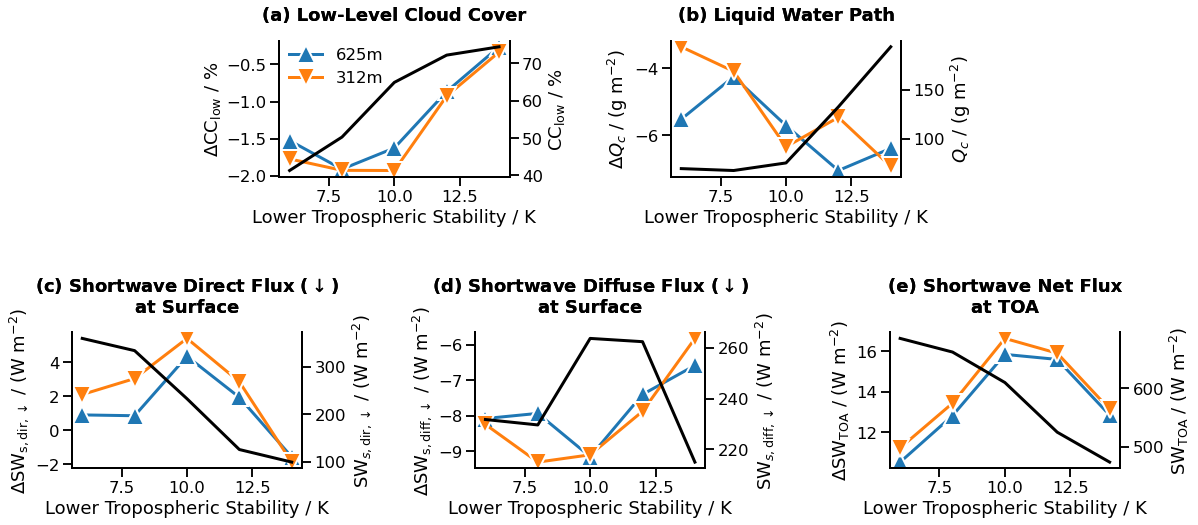

In [25]:
s = 1
fig = plt.figure( figsize = (s*16,s*9))

## CC ---------
w, h = 0.2, 0.21

a = fig.add_axes([0.23, 0.55, w, h])

kws = dict( ylabel1 = '$\Delta\mathrm{CC_{low}}$ / %', 
            ylabel2 = '$\mathrm{CC_{low}}$ / %',
            title   =  '(a) Low-Level Cloud Cover',
            plot_legend = True,)

plot_var( 'clcl',  ax = a, **kws )


## LWP ---------
a = fig.add_axes([0.57, 0.55, w, h])
kws = dict( ylabel1 = '$\Delta Q_c$ / (g m${}^{-2}$)',
            ylabel2 = '$Q_c$ / (g m${}^{-2}$)',
            scale = 1e3,
            title   =  '(b) Liquid Water Path')

plot_var( 'clwvi', ax = a, **kws)


## SW surf ---------
a = fig.add_axes([0.05, 0.1, w, h])
kws = dict( ylabel1 = '$\Delta\mathrm{SW_{s, \mathrm{dir}, \downarrow }}$ / (W m${}^{-2}$)',
            ylabel2 = '$\mathrm{SW}_{ s, \mathrm{dir}, \downarrow }}$ / (W m${}^{-2}$)',
            title   =  '(c) Shortwave Direct Flux ($\downarrow$)\nat Surface')

plot_var( 'sodird_s', ax = a, **kws)

## SW surf ---------
a = fig.add_axes([0.4, 0.1, w, h])
kws = dict( ylabel1 = '$\Delta\mathrm{SW_{s, \mathrm{diff}, \downarrow }}$ / (W m${}^{-2}$)',
            ylabel2 = '$\mathrm{SW}_{ s, \mathrm{diff}, \downarrow }}$ / (W m${}^{-2}$)',
            title   =  '(d) Shortwave Diffuse Flux ($\downarrow$)\nat Surface')

plot_var( 'sodifd_s', ax = a, **kws)

## SW TOA ---------
a = fig.add_axes([0.76, 0.1, w, h])
kws = dict( ylabel1 = '$\Delta\mathrm{SW_\mathrm{TOA}}$ / (W m${}^{-2}$)',
            ylabel2 = '$\mathrm{SW}_\mathrm{ TOA }}$ / (W m${}^{-2}$)',
            title   =  '(e) Shortwave Net Flux\nat TOA')

plot_var( 'sob_t', ax = a,  **kws)

plt.savefig( '../pics/lst_depencencies.png', dpi = 300)